In [ ]:
#Set the path to the assignment folder in GDrive
from google.colab import drive

try:
  drive.mount('/content/gdrive')
except:
  print("Load the drive manually from the left panel first. Then run this again,")
  pathBase="/content/drive/MyDrive/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Import necessary Python libraries
%%time
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import json
import statsmodels.api as sm
import urllib
import urllib.request
import matplotlib as mpl
import seaborn as sns
import patsy
import plotly
import sys
import plotly.graph_objects as go
import statsmodels.formula.api as smf
import os
import csv
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix



CPU times: user 80 µs, sys: 15 µs, total: 95 µs
Wall time: 101 µs


In [ ]:
dataset = pd.read_csv("/content/gdrive/MyDrive/diabetes.csv")


# data processing

In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
num_samples = dataset.shape[0]
num_features = dataset.shape[1]

print("number:", num_samples)
print("features:", num_features)

number: 768
features: 9


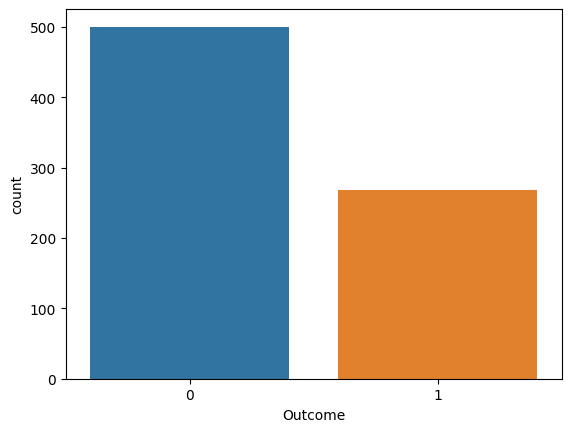

In [ ]:
sns.countplot(x=dataset["Outcome"]);
plt.show()

In [ ]:
zero_percentage = (dataset == 0).mean() * 100
result_df = pd.DataFrame({'Zero Percentage': zero_percentage})
result_df


,Zero Percentage
Pregnancies,14.453125
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000
Outcome,65.104167


# Splitting the dataset

In [ ]:
X = dataset.drop("Outcome", axis=1)
y = dataset["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(50, 25), alpha=0.0001, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
matrix = confusion_matrix(y_test, y_pred)
df1 = pd.DataFrame(matrix)
df1

,0,1
0,76,23
1,21,34


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7142857142857143
Precision: 0.7167144665788181
Recall: 0.7142857142857143
F1-score: 0.7153790087463556


In [ ]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_df1 = pd.DataFrame(class_report).transpose()
class_df1

,precision,recall,f1-score,support
0,0.783505,0.767677,0.775510,99.000000
1,0.596491,0.618182,0.607143,55.000000
accuracy,0.714286,0.714286,0.714286,0.714286
macro avg,0.689998,0.692929,0.691327,154.000000
weighted avg,0.716714,0.714286,0.715379,154.000000


In [ ]:
macro_precision = precision_score(y_test, y_pred, average='macro')
micro_precision = precision_score(y_test, y_pred, average='micro')

macro_recall = recall_score(y_test, y_pred, average='macro')
micro_recall = recall_score(y_test, y_pred, average='micro')

macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print("Macro Precision:", macro_precision)
print("Micro Precision:", micro_precision)
print("Macro Recall:", macro_recall)
print("Micro Recall:", micro_recall)
print("Macro F1-score:", macro_f1)
print("Micro F1-score:", micro_f1)

Macro Precision: 0.6899981913546753
Micro Precision: 0.7142857142857143
Macro Recall: 0.692929292929293
Micro Recall: 0.7142857142857143
Macro F1-score: 0.6913265306122448
Micro F1-score: 0.7142857142857143


In [ ]:
solvers = ['lbfgs', 'sgd', 'adam']


for solver in solvers:

    model = MLPClassifier(solver=solver,hidden_layer_sizes=(50, 25), max_iter=10000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Solver: {solver}, Accuracy: {accuracy}")

Solver: lbfgs, Accuracy: 0.6623376623376623
Solver: sgd, Accuracy: 0.7402597402597403
Solver: adam, Accuracy: 0.7142857142857143


In [ ]:

alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]

accuracies = []

for alpha in alpha_values:

    model = MLPClassifier(hidden_layer_sizes=(50, 25), alpha=alpha, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)



Highest Accuracy: 0.7532467532467533 for alpha = 1
Second Highest Accuracy: 0.7337662337662337 for alpha = 0.1


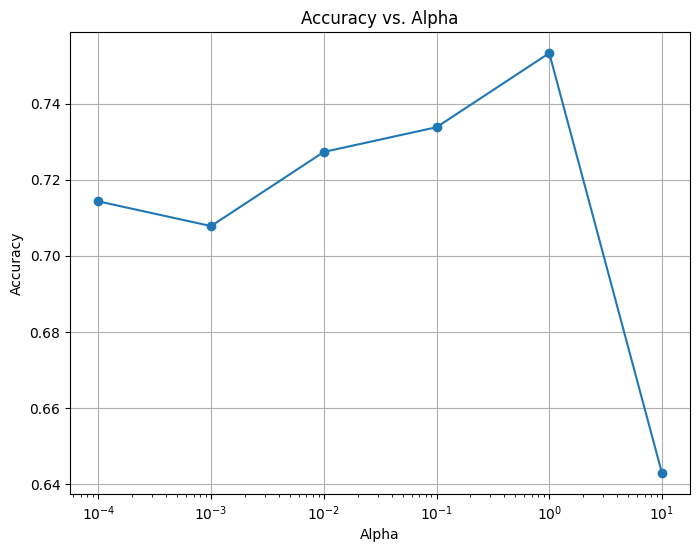

In [ ]:
max_accuracy_index = np.argmax(accuracies)
second_max_accuracy_index = np.argsort(accuracies)[-2]

print("Highest Accuracy:", accuracies[max_accuracy_index], "for alpha =", alpha_values[max_accuracy_index])
print("Second Highest Accuracy:", accuracies[second_max_accuracy_index], "for alpha =", alpha_values[second_max_accuracy_index])

plt.figure(figsize=(8, 6))
plt.plot(alpha_values, accuracies, marker='o')
plt.title("Accuracy vs. Alpha")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.xscale('log')
plt.grid(True)
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_classifier = SVC(kernel='linear', C=1.0)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
df2 = pd.DataFrame(matrix)
df2

,0,1
0,81,18
1,19,36


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6545454545454545
F1-score: 0.6605504587155963


In [ ]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_df2 = pd.DataFrame(class_report).transpose()
class_df2

,precision,recall,f1-score,support
0,0.810000,0.818182,0.814070,99.00000
1,0.666667,0.654545,0.660550,55.00000
accuracy,0.759740,0.759740,0.759740,0.75974
macro avg,0.738333,0.736364,0.737310,154.00000
weighted avg,0.758810,0.759740,0.759242,154.00000


In [ ]:
macro_precision = precision_score(y_test, y_pred, average='macro')
micro_precision = precision_score(y_test, y_pred, average='micro')

macro_recall = recall_score(y_test, y_pred, average='macro')
micro_recall = recall_score(y_test, y_pred, average='micro')

macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print("Macro Precision:", macro_precision)
print("Micro Precision:", micro_precision)
print("Macro Recall:", macro_recall)
print("Micro Recall:", micro_recall)
print("Macro F1-score:", macro_f1)
print("Micro F1-score:", micro_f1)

Macro Precision: 0.7383333333333333
Micro Precision: 0.7597402597402597
Macro Recall: 0.7363636363636363
Micro Recall: 0.7597402597402597
Macro F1-score: 0.737310405237195
Micro F1-score: 0.7597402597402597


# LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train, y_train)
y_pred = logreg_classifier.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
df3= pd.DataFrame(matrix)
df3

,0,1
0,79,20
1,18,37


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727
F1-score: 0.6607142857142858


In [ ]:
class_report = classification_report(y_test, y_pred, output_dict=True)
class_df3 = pd.DataFrame(class_report).transpose()
class_df3

,precision,recall,f1-score,support
0,0.814433,0.797980,0.806122,99.000000
1,0.649123,0.672727,0.660714,55.000000
accuracy,0.753247,0.753247,0.753247,0.753247
macro avg,0.731778,0.735354,0.733418,154.000000
weighted avg,0.755394,0.753247,0.754191,154.000000


In [ ]:
macro_precision = precision_score(y_test, y_pred, average='macro')
micro_precision = precision_score(y_test, y_pred, average='micro')

macro_recall = recall_score(y_test, y_pred, average='macro')
micro_recall = recall_score(y_test, y_pred, average='micro')

macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print("Macro Precision:", macro_precision)
print("Micro Precision:", micro_precision)
print("Macro Recall:", macro_recall)
print("Micro Recall:", micro_recall)
print("Macro F1-score:", macro_f1)
print("Micro F1-score:", micro_f1)

Macro Precision: 0.7317778983541328
Micro Precision: 0.7532467532467533
Macro Recall: 0.7353535353535354
Micro Recall: 0.7532467532467533
Macro F1-score: 0.7334183673469388
Micro F1-score: 0.7532467532467532


# conduct a significance test

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

In [ ]:
b = df1.iloc[0,1] - df2.iloc[0,1]
c = df1.iloc[1,0] - df2.iloc[1,0]

table = np.array([[0, b], [c, 0]])

result = mcnemar(table, exact=False, correction=True)


print(f"statistic={result.statistic}, p-value={result.pvalue}")


alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors')
else:
    print('Different proportions of errors）')

statistic=0.5714285714285714, p-value=0.4496917979688908
Same proportions of errors


In [ ]:
b = df1.iloc[0,1] - df3.iloc[0,1]
c = df1.iloc[1,0] - df3.iloc[1,0]

table = np.array([[0, b], [c, 0]])

result = mcnemar(table, exact=False, correction=True)


print(f"statistic={result.statistic}, p-value={result.pvalue}")


alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors')
else:
    print('Different proportions of errors）')

statistic=0.16666666666666666, p-value=0.6830913983096086
Same proportions of errors


In [ ]:
b = df2.iloc[0,1] - df3.iloc[0,1]
c = df2.iloc[1,0] - df3.iloc[1,0]

table = np.array([[0, b], [c, 0]])

result = mcnemar(table, exact=False, correction=True)


print(f"statistic={result.statistic}, p-value={result.pvalue}")


alpha = 0.05
if result.pvalue > alpha:
    print('Same proportions of errors')
else:
    print('Different proportions of errors）')

statistic=-4.0, p-value=1.0
Same proportions of errors


In [ ]:
# Try some data normalization techniques. NOTE: You may have to look at the classifier results to determine the impact of normalization techniques

# Separate the data columns into features and labels

# Split dataset into random train and test subsets


In [ ]:
#implement the classifiers and evalaute separately. For evaluation, use classificationreport functionality of sklearn